In [1]:
#imports
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [21]:
#converting log file to csv file

data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

log_file = data_folder/"03-31raw.txt"    #log.txt or raw log txt file; format:date-raw.txt
csv_file = data_folder/"03-31raw.csv"   # raw csv file format; format:date-raw.csv


with open(log_file, 'r') as file:
    lines = file.readlines()

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)

    # Write the header row (variable names)
    header = ['second', 'distance', 'motion', 'lightIntensity', 'occupied']
    csv_writer.writerow(header)

    # Process each line in the log file
    for line in lines:
        # Remove extra spaces and newline characters
        line = line.strip()

        # Split the line to extract the id and variables
        id_part, data_part = line.split(' -> ')
        second = id_part.strip()  # Renamed from 'id' to 'second'

        # Further split the data part to extract individual variable values
        data_items = data_part.split(', ')
        values = [second]  # Start with second

        # Extract the values from each variable
        data_dict = {item.split(': ')[0]: item.split(': ')[1].strip() for item in data_items}

        # Ensure all variables are in the correct order and connected_devices is handled properly
        values.extend([
            data_dict.get('distance', '0.00'),
            data_dict.get('motion', '0'),
            data_dict.get('lightIntensity', '0.00'),
            data_dict.get('occupied', '0')
        ])

        csv_writer.writerow(values)

print(f'Conversion complete. Data saved to {csv_file}.')

Conversion complete. Data saved to c:\Users\kentv\OneDrive\Desktop\Smart Alert\Smart-Alert-Lab-ML\data\03-31raw.csv.


In [23]:
#cleaning the data

data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

csv_file = data_folder/"combinedNoLK.csv"   #raw csv file format; format:date-raw.csv
modified_csv_file = data_folder/"combinedNoLK.csv"   #clean csv file format; format:date-clean.csv

df = pd.read_csv(csv_file)

# Filter out rows where distance is not greater than 0
df = df[df["distance"] > 0].copy()

# Reset the 'seconds' column to increment sequentially from 1 to the length of the DataFrame
df["second"] = range(1, len(df) + 1)

df.to_csv(modified_csv_file, index=False)

In [15]:
#insert values manually into occupied_note

data_folder = Path.cwd() / "data"
input_file = data_folder / "04-01clean.csv"
output_file = data_folder / "04-01note.csv"

# Parameters to modify
start_row = 0      # inclusive, 1-based
end_row = 31580        # inclusive
value_to_insert = 0   # 1 (in room) or 0 (not in room)

df = pd.read_csv(input_file)

# Create column only if it doesn't exist
if "occupied_note" not in df.columns:
    df["occupied_note"] = pd.NA

df.loc[start_row - 1:end_row - 1, "occupied_note"] = value_to_insert

df.to_csv(output_file, index=False)


In [22]:
#appending the data to a combined csv file

data_folder = Path.cwd() / "data"
csv_from = data_folder / "04-01note.csv"
csv_to = data_folder / "combinedNoLK.csv"

df_from = pd.read_csv(csv_from)
df_to = pd.read_csv(csv_to)

df_combined = pd.concat([df_to, df_from], ignore_index=True)

df_combined.to_csv(csv_to, index=False)

print("Data successfully copied and appended!")


Data successfully copied and appended!


In [16]:
#importing the cleaned data for analysis
#note this is not modified_log.csv but logwNotes.csv as I have manually added occupied_notes
data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

csv_analysis = data_folder/"04-01clean.csv" # format date-note.csv
df = pd.read_csv(csv_analysis)

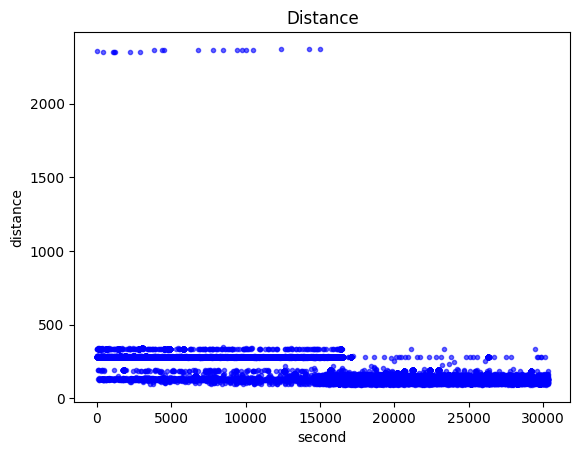

In [17]:
#plotting Distance 
plt.scatter(df['second'], df['distance'], marker='.', color='b', alpha=0.6)
plt.title('Distance')
plt.xlabel('second')
plt.ylabel('distance')
plt.show()

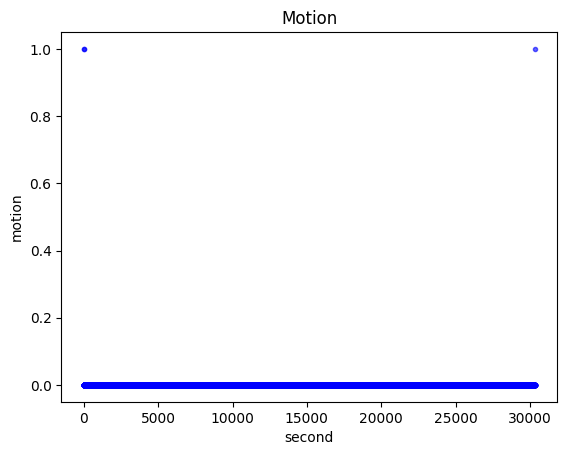

In [18]:
#plotting Motion

plt.scatter(df['second'], df['motion'], marker='.', color='b', alpha=0.6)
plt.title('Motion')
plt.xlabel('second')
plt.ylabel('motion')
plt.show()

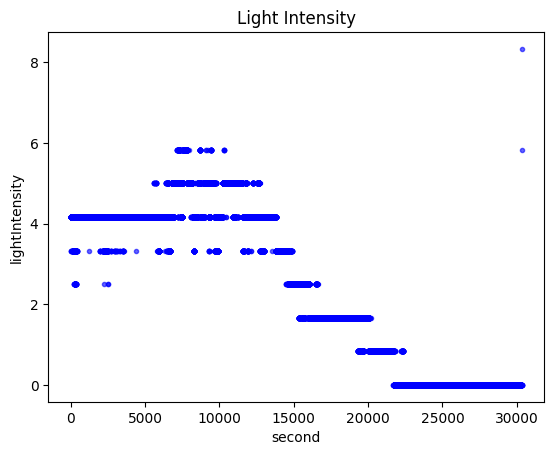

In [19]:
#plotting lightIntensity

plt.scatter(df['second'], df['lightIntensity'], marker='.', color='b', alpha=0.6)
plt.title('Light Intensity')
plt.xlabel('second')
plt.ylabel('lightIntensity')
plt.show()

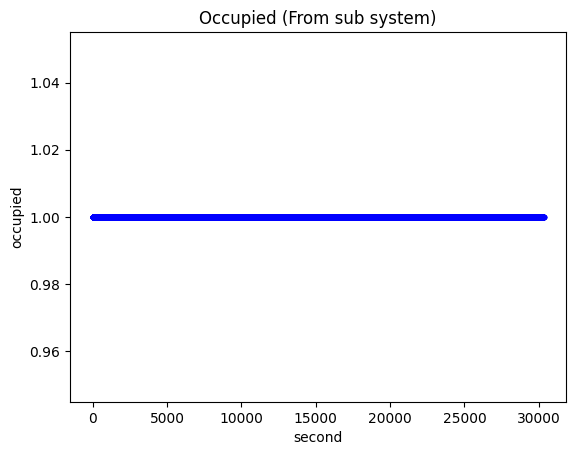

In [20]:
#plotting occupied

plt.scatter(df['second'], df['occupied'], marker='.', color='b', alpha=0.6)
plt.title('Occupied (From sub system)')
plt.xlabel('second')
plt.ylabel('occupied')
plt.show() 

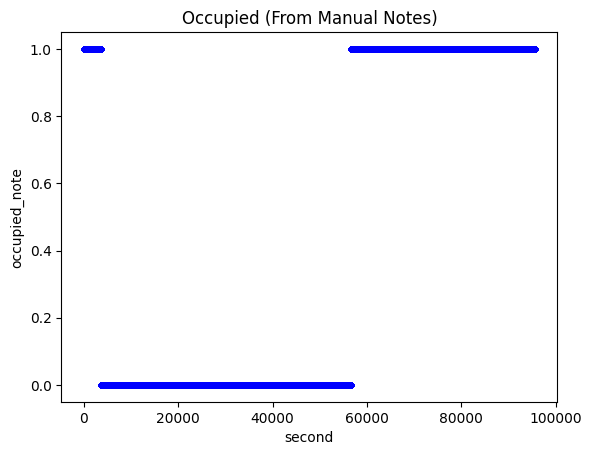

In [18]:
#plotting occupied_note

plt.scatter(df['second'], df['occupied_note'], marker='.', color='b', alpha=0.6)
plt.title('Occupied (From Manual Notes)')
plt.xlabel('second')
plt.ylabel('occupied_note')
plt.show() 